Epoch 1/10
1/1 [==============================] - 8s 8s/step - loss: 2.1594 - accuracy: 0.0042
Epoch 2/10
1/1 [==============================] - 6s 6s/step - loss: 0.0111 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 0.0027 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 1.2672e-04 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 5s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 1s 1s/step


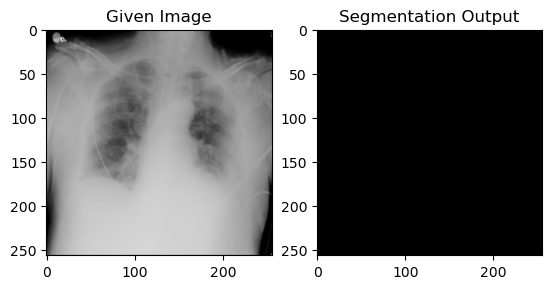

In [8]:
import tensorflow as tf
from tensorflow.keras import layers
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the UNet model
def unet_model(input_size):
    inputs = tf.keras.Input(input_size)

    # Contracting path
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = layers.Dropout(0.5)(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottom
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = layers.Dropout(0.5)(conv5)

    # Expansive path
    up6 = layers.Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(drop5))
    merge6 = layers.concatenate([drop4, up6], axis=3)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = layers.Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv6))
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = layers.Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv7))
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = layers.Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv8))
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = layers.Conv2D(2, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    # Output
    output = layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = tf.keras.Model(inputs=inputs, outputs=output)

    return model

# Load the image
img = cv2.imread('/rp_implementation/DATASETS/COVID-19_Radiography_Dataset/COVID/i_s/COVID-1.png')

# Preprocess the image
# ...

# Convert the image to the input format
img = cv2.resize(img, (256, 256))
img = np.expand_dims(img, axis=0)
img = img / 255.0

# Define the model
model = unet_model(input_size=(256, 256, 3))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mask = np.zeros((1, 256, 256, 1))
model.fit(x=img, y=mask, batch_size=1, epochs=10)

# Make the segmentation
mask = model.predict(img)

# Visualize the segmentation
plt.subplot(1, 2, 1)
plt.imshow(img[0])
plt.title('Given Image')

plt.subplot(1, 2, 2)
plt.imshow(mask[0, :, :, 0], cmap='gray')
plt.title('Segmentation Output')

plt.show()


Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 1.9881 - accuracy: 0.0062
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.6778 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.0027 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 3s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 3s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 1s 1s/step


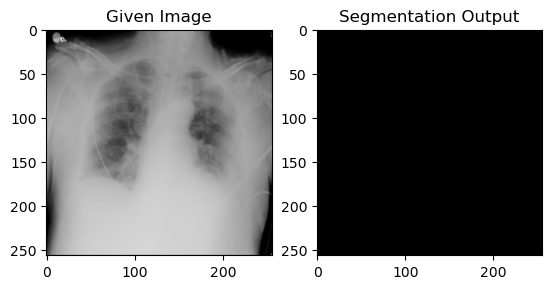

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the UNet model
def unet_model(input_size):
    inputs = tf.keras.Input(input_size)

    # Contracting path
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = layers.Dropout(0.5)(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottom
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = layers.Dropout(0.5)(conv5)

    # Expansive path
    up6 = layers.Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(drop5))
    merge6 = layers.concatenate([drop4, up6], axis=3)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = layers.Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv6))
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = layers.Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv7))
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = layers.Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv8))
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = layers.Conv2D(2, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    # Output
    output = layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = tf.keras.Model(inputs=inputs, outputs=output)

    return model
img = cv2.imread('/rp_implementation/DATASETS/COVID-19_Radiography_Dataset/COVID/i_s/COVID-1.png')
mask_img = cv2.imread('/rp_implementation/DATASETS/COVID-19_Radiography_Dataset/COVID/i_s/COVID-1.png')

# Preprocess the image and the mask
# ...

# Convert the image and the mask to the input format
img = cv2.resize(img, (256, 256))
img = np.expand_dims(img, axis=0)
img = img / 255.0

mask_img = cv2.resize(mask_img, (256, 256))
mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
mask_img = np.expand_dims(mask_img, axis=0)
mask_img = np.expand_dims(mask_img, axis=3)
mask_img = mask_img / 255.0

# Define the model
model = unet_model(input_size=(256, 256, 3))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

model.fit(x=img, y=mask, batch_size=1, epochs=10)

# Make the segmentation
mask = model.predict(img)

# Visualize the segmentation
plt.subplot(1, 2, 1)
plt.imshow(img[0])
plt.title('Given Image')

plt.subplot(1, 2, 2)
plt.imshow(mask[0, :, :, 0], cmap='gray')
plt.title('Segmentation Output')

plt.show()


Epoch 1/5
1/1 [==============================] - 6s 6s/step - loss: 0.5580 - accuracy: 0.7656
Epoch 2/5
1/1 [==============================] - 4s 4s/step - loss: 5114.6680 - accuracy: 0.7656
Epoch 3/5
1/1 [==============================] - 3s 3s/step - loss: 0.8675 - accuracy: 0.7656
Epoch 4/5
1/1 [==============================] - 3s 3s/step - loss: 0.5365 - accuracy: 0.7656
Epoch 5/5
1/1 [==============================] - 1s 915ms/step


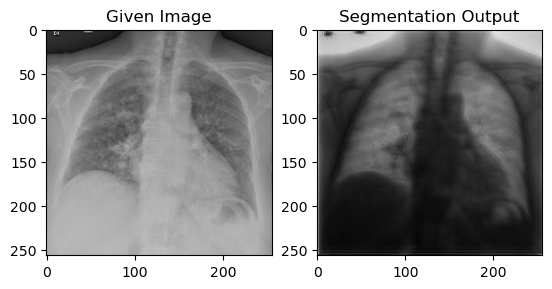

In [33]:
import tensorflow as tf
from tensorflow.keras import layers
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the UNet model
def unet_model(input_size):
    inputs = tf.keras.Input(input_size)

    # Contracting path
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = layers.Dropout(0.5)(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottom
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = layers.Dropout(0.5)(conv5)

    # Expansive path
    up6 = layers.Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(drop5))
    merge6 = layers.concatenate([drop4, up6], axis=3)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = layers.Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv6))
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = layers.Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv7))
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = layers.Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv8))
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = layers.Conv2D(2, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    # Output
    output = layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = tf.keras.Model(inputs=inputs, outputs=output)

    return model

# Load the COVID-19 Radiography Dataset
img = cv2.imread('/rp_implementation/DATASETS/COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg')
mask_img = cv2.imread('/rp_implementation/DATASETS/COVID-19_Radiography_Dataset/COVID/m_s/COVID-1.png')

# Preprocess the image and the mask
# ...

# Convert the image and the mask to the input format
img = cv2.resize(img, (256, 256))
img = np.expand_dims(img, axis=0)
img = img / 255.0

mask_img = cv2.resize(mask_img, (256, 256))
mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
mask_img = np.expand_dims(mask_img, axis=0)
mask_img = np.expand_dims(mask_img, axis=3)
mask_img = mask_img / 255.0

# Define the model
model = unet_model(input_size=(256, 256, 3))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mask = np.zeros((1, 256, 256, 1))
# Train the model
model.fit(x=img, y=mask_img, batch_size=1, epochs=5)

# Make the segmentation
segmentation = model.predict(img)

# Visualize the segmentation
plt.subplot(1, 2, 1)
plt.imshow(img[0])
plt.title('Given Image')

plt.subplot(1, 2, 2)
plt.imshow(segmentation[0, :, :, 0], cmap='gray')
plt.title('Segmentation Output')

plt.show()


In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the UNet model
def unet_model(input_size):
    inputs = tf.keras.Input(input_size)

    # Contracting path
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = layers.Dropout(0.5)(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottom
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = layers.Dropout(0.5)(conv5)

    # Expansive path
    up6 = layers.Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(drop5))
    merge6 = layers.concatenate([drop4, up6], axis=3)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = layers.Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv6))
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = layers.Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv7))
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = layers.Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(layers.UpSampling2D(size=(2, 2))(conv8))
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = layers.Conv2D(2, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    # Output
    output = layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = tf.keras.Model(inputs=inputs, outputs=output)

    return model

for filename in os.listdir("/rp_implementation/DATASETS/COVID_IEEE/covid/"):
    # Load image
    img = cv2.imread(os.path.join("/rp_implementation/DATASETS/COVID_IEEE/covid/", filename))

    # Check if the image is empty
    img = cv2.resize(img, (256, 256))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    model = unet_model(input_size=(256, 256, 3))

# Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    mask = np.zeros((1, 256, 256, 1))
# Train the model
    model.fit(x=img, y=mask, batch_size=1, epochs=5)

# Make the segmentation
    segmentation = model.predict(img)
    # Save binary image
    cv2.imwrite(os.path.join("/rp_implementation/DATASETS/COVID_IEEE/covid_1/", filename), segmentation)